In [3]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
#Upload do Arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks_Database.xlsx to AdventureWorks_Database.xlsx


In [5]:
df = pd.read_excel("AdventureWorks_Database.xlsx", sheet_name=3)

In [6]:
df.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.1350,2171.2942,3578.2700,286.2616
1,346,2014-01-01,2014-01-08,28389,1,7,SO43698,1,2,1699.9950,1912.1544,3399.9900,271.9992
2,346,2014-01-01,2014-01-08,25863,1,1,SO43699,1,2,1699.9950,1912.1544,3399.9900,271.9992
3,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,413.1463,699.0982,55.9279
4,346,2014-01-01,2014-01-08,11003,1,9,SO43701,1,2,1699.9950,1912.1544,3399.9900,271.9992


In [7]:
df.shape

(58189, 13)

In [8]:
df.dtypes

ProductKey                       int64
OrderDate               datetime64[ns]
ShipDate                datetime64[ns]
CustomerKey                      int64
PromotionKey                     int64
SalesTerritoryKey                int64
SalesOrderNumber                object
SalesOrderLineNumber             int64
OrderQuantity                    int64
UnitPrice                      float64
TotalProductCost               float64
SalesAmount                    float64
TaxAmt                         float64
dtype: object

In [9]:
#Qual a receita total ?
df["SalesAmount"].sum()

29307836.590699993

In [10]:
#Qual o custo total ?
df["TotalProductCost"].sum()

17255318.663299996

In [11]:
#Total Lucro ?
df["profit"] = df["SalesAmount"] - df["TotalProductCost"]

In [13]:
df.head(1)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,profit
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,2171.2942,3578.27,286.2616,1406.9758


In [17]:
#Lucro Total
round(df["profit"].sum(), 2)

12052517.93

In [23]:
#Criando coluna com tempo total para enviar produto
df["ShipTime"] = df["ShipDate"] - df["OrderDate"]

In [24]:
df.head(1)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,profit,ShipTime
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,2171.2942,3578.27,286.2616,1406.9758,7 days


In [32]:
#Extraindo apenas o valor numerico de dias
df["ShipTime"] = (df["ShipDate"] - df["OrderDate"]).dt.days

In [33]:
df.head(1)

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,profit,ShipTime
0,310,2014-01-01,2014-01-08,21768,1,6,SO43697,1,2,1789.135,2171.2942,3578.27,286.2616,1406.9758,7


In [34]:
df["ShipTime"].dtype

dtype('int64')

In [37]:
#Media de dias para envio por Territorio de Venda
df.groupby("SalesTerritoryKey")["ShipTime"].mean()

SalesTerritoryKey
1     6.999417
2     6.925926
3     7.000000
4     7.002444
5     7.088235
6     6.995099
7     7.000000
8     7.000916
9     7.017037
10    7.011477
Name: ShipTime, dtype: float64

In [38]:
#Verificando valores ausentes
df.isnull().sum()

ProductKey              0
OrderDate               0
ShipDate                0
CustomerKey             0
PromotionKey            0
SalesTerritoryKey       0
SalesOrderNumber        0
SalesOrderLineNumber    0
OrderQuantity           0
UnitPrice               0
TotalProductCost        0
SalesAmount             0
TaxAmt                  0
profit                  0
ShipTime                0
dtype: int64

In [41]:
#Lucro por ano e por territorio de venda
df.groupby([df["OrderDate"].dt.year, "SalesTerritoryKey"])["profit"].sum()

OrderDate  SalesTerritoryKey
2014       1                             369,830.13
           4                             609,693.65
           6                             228,167.88
           7                             166,216.91
           8                             206,706.78
           9                           1,040,547.10
           10                            221,993.12
2015       1                             258,510.25
           2                                 943.29
           3                                 953.56
           4                             340,210.52
           5                               1,546.13
           6                             125,668.33
           7                             259,348.70
           8                             241,845.81
           9                             879,949.40
           10                            285,477.30
2016       1                             885,648.40
           2                       

In [40]:
#Formatar saida padrao em notacao cientifica para duas casas decimais
pd.options.display.float_format = '{:20,.2f}'.format

In [43]:
#Resetando o index
YearProfit = df.groupby([df["OrderDate"].dt.year, "SalesTerritoryKey"])["profit"].sum().reset_index()
YearProfit

,OrderDate,SalesTerritoryKey,profit
0,2014,1,"369,830.13"
1,2014,4,"609,693.65"
2,2014,6,"228,167.88"
3,2014,7,"166,216.91"
4,2014,8,"206,706.78"
5,2014,9,"1,040,547.10"
6,2014,10,"221,993.12"
7,2015,1,"258,510.25"
8,2015,2,943.29
9,2015,3,953.56


In [44]:
#Produtos mais vendidos
df.groupby("ProductKey")["OrderQuantity"].sum().sort_values(ascending=False)

ProductKey
477    6370
480    4705
528    4551
529    3544
214    3398
       ... 
324      31
332      28
322      28
340      26
338      26
Name: OrderQuantity, Length: 158, dtype: int64

Text(0, 0.5, 'Produto')

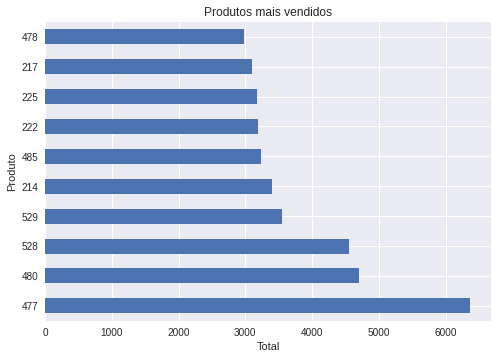

In [48]:
#Grafico 10 produtos mais vendidos
df.groupby("ProductKey")["OrderQuantity"].sum().sort_values(ascending=False)[:10].plot.barh(title='Produtos mais vendidos')
plt.xlabel("Total")
plt.ylabel("Produto")

Text(0, 0.5, 'Receita')

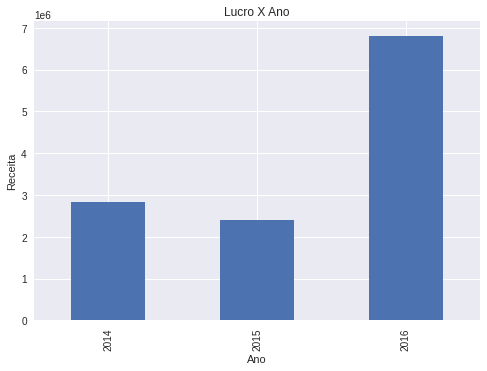

In [49]:
df.groupby(df["OrderDate"].dt.year)["profit"].sum().plot.bar(title='Lucro X Ano')
plt.xlabel('Ano')
plt.ylabel('Receita')

In [50]:
df.groupby(df["OrderDate"].dt.year)["profit"].sum()

OrderDate
2014           2,843,155.57
2015           2,394,453.30
2016           6,814,909.06
Name: profit, dtype: float64

In [51]:
#Selecionando apenas as vendas de 2016
df_2016 = df[df["OrderDate"].dt.year == 2016]

In [52]:
df_2016.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,profit,ShipTime
5428,380,2016-01-01,2016-01-08,18239,1,9,SO51176,1,1,"2,443.35","1,554.95","2,443.35",195.47,888.40,7
5429,479,2016-01-01,2016-01-08,18239,1,9,SO51176,2,1,8.99,3.36,8.99,0.72,5.63,7
5430,577,2016-01-01,2016-01-08,27873,1,9,SO51177,1,1,"1,214.85",755.15,"1,214.85",97.19,459.70,7
5431,217,2016-01-01,2016-01-08,27873,1,9,SO51177,2,1,34.99,13.09,34.99,2.80,21.90,7
5432,353,2016-01-01,2016-01-08,11245,2,8,SO51178,1,1,"2,319.99","1,265.62","2,319.99",185.60,"1,054.37",7


Text(0, 0.5, 'Lucro')

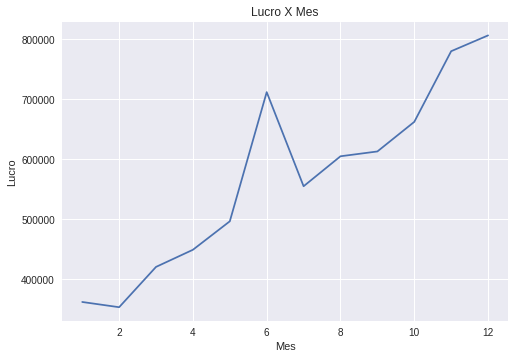

In [55]:
df_2016.groupby(df_2016["OrderDate"].dt.month)["profit"].sum().plot(title="Lucro X Mes")
plt.xlabel('Mes')
plt.ylabel('Lucro')

Text(0, 0.5, 'Lucro')

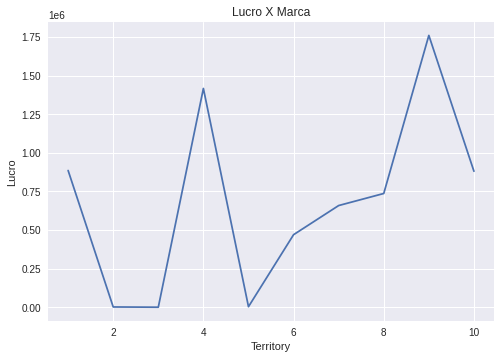

In [56]:
df_2016.groupby("SalesTerritoryKey")["profit"].sum().plot(title="Lucro X Marca")
plt.xlabel('Territory')
plt.ylabel('Lucro')

In [57]:
df["ShipTime"].describe()

count              58,189.00
mean                    7.01
std                     0.57
min                     4.00
25%                     7.00
50%                     7.00
75%                     7.00
max                    10.00
Name: ShipTime, dtype: float64

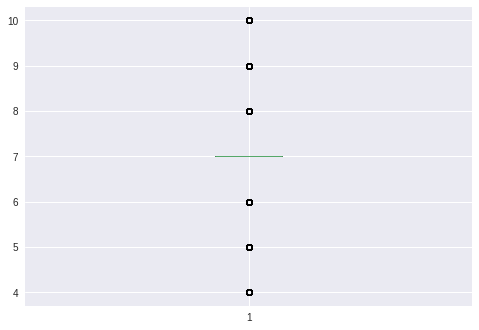

In [62]:
#Grafico de boxplot
plt.boxplot(df["ShipTime"]);

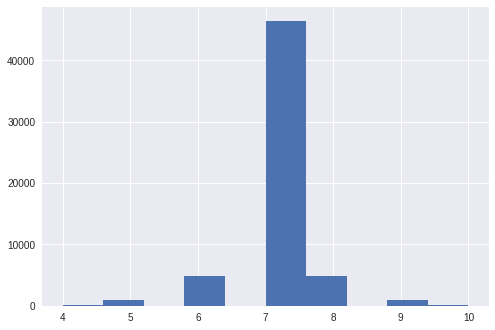

In [63]:
#Histograma
plt.hist(df["ShipTime"]);

In [67]:
#Tempo minimo de envio
df["ShipTime"].min()

4

In [68]:
#Tempo maximo de envio
df["ShipTime"].max()

10

In [69]:
#Identificando outlier
df[df["ShipTime"] == 10]

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,TotalProductCost,SalesAmount,TaxAmt,profit,ShipTime
1323,345,2014-08-22,2014-09-01,11422,1,10,SO45467,1,1,"3,399.99","1,912.15","3,399.99",272.00,"1,487.84",10
1324,311,2014-08-22,2014-09-01,23164,1,6,SO45468,1,1,"3,578.27","2,171.29","3,578.27",286.26,"1,406.98",10
1325,350,2014-08-22,2014-09-01,19989,1,6,SO45469,1,1,"3,374.99","1,898.09","3,374.99",270.00,"1,476.90",10
1326,312,2014-08-22,2014-09-01,28177,1,6,SO45470,1,1,"3,578.27","2,171.29","3,578.27",286.26,"1,406.98",10
1327,313,2014-08-22,2014-09-01,29280,1,1,SO45471,1,1,"3,578.27","2,171.29","3,578.27",286.26,"1,406.98",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201,356,2015-08-28,2015-09-07,14020,1,9,SO49438,1,1,"2,071.42","1,117.86","2,071.42",165.71,953.56,10
4202,356,2015-08-28,2015-09-07,14064,1,9,SO49439,1,1,"2,071.42","1,117.86","2,071.42",165.71,953.56,10
4203,360,2015-08-28,2015-09-07,14101,1,9,SO49440,1,1,"2,049.10","1,105.81","2,049.10",163.93,943.29,10
4204,358,2015-08-28,2015-09-07,27044,1,4,SO49441,1,1,"2,049.10","1,105.81","2,049.10",163.93,943.29,10


In [70]:
df.to_csv("df_vendas_novo.csv", index=False)